In [1]:
import numpy as np
import pandas as pd
import gget
import glob
import networkx as nx
import os
import seaborn as sns
import gget
from textwrap import fill
import scanpy as sc
import anndata as an
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csr_matrix 

# locals
import utils as ut
import plotting as plt2

sc.settings.verbosity = 3  

# Load data 

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/analysis.anndata.h5ad"

adata = sc.read_h5ad(fpath)
adata.X = adata.layers['raw_counts'].copy()
adata.obs['UMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['UMAP 2'] = adata.obsm['X_umap'][:, 1]

sc.pp.normalize_total(
        adata, 
        target_sum=1e6,
        key_added='norm_factor',
)

adata.layers["cpm"] = adata.X.copy()

adata

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 8563 × 15065
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'EC_score', 'EB_score', 'FB_score', 'HSC_score', 'MK_score', 'new_cluster', 'cluster_str', 'UMAP 1', 'UMAP 2', 'norm_factor'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id', 'tf', 'bj', 'hsc', 'EC', 'EB', 'FB', 'HSC', 'MK', 'cluster_genes'
    uns: 'HSC_vs_FB', 'HSC_vs_FB_pure', 'clusters', 'deg', 'fb_vs_hsc_up', 'go_annotations', 'hsc_v_fib_up', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'panglaodb', 'pca', 'scenic_transcription_factors', 'scrublet', 'tabula_sapiens_deg', 'umap', 'v5_tags'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'filtered_counts', 'raw_counts', 'cpm'
    obsp: 'connectivi

# Plot functions

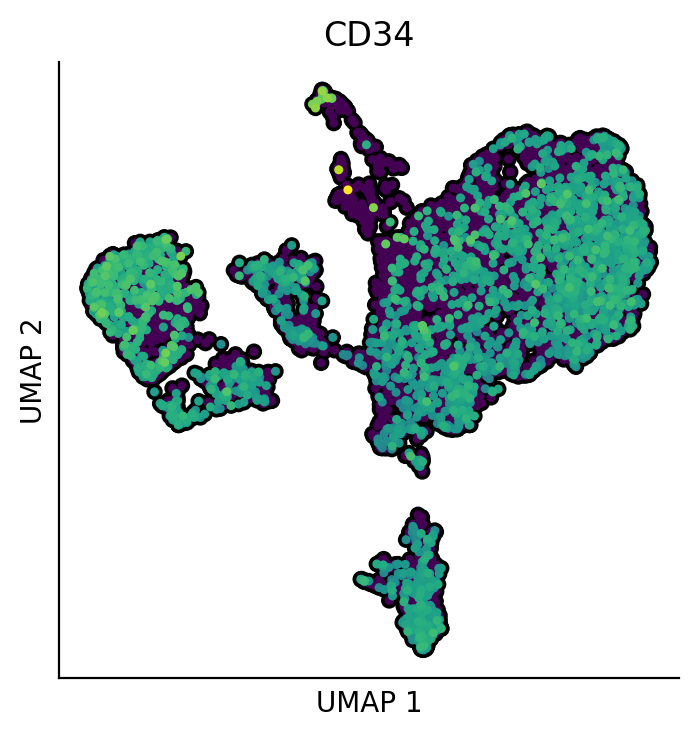

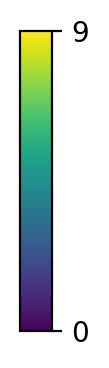

In [4]:
def plot_gene_expression(adata, query):
    """
    Plots gene expression on a UMAP embedding and displays expression range.

    Args:
        adata: An AnnData object containing UMAP coordinates and gene expression data.
        query: The name of the gene to plot expression for.
    """

    # Extract expression data and sort by expression value
    expression = np.ravel(adata[:, query].X)
    sort_order = np.argsort(expression)

    # Plot background UMAP in light grey
    sns.scatterplot(
        data=adata.obs,
        x='UMAP 1',
        y='UMAP 2',
        ec='none', 
        s=35,
        color='k',
    )

    # Plot gene expression on UMAP, colored by expression level
    scatter = plt.scatter(
        adata.obs['UMAP 1'].values[sort_order],
        adata.obs['UMAP 2'].values[sort_order],
        c=np.log1p(expression[sort_order]),
        s=5
    )
    
    # Display expression range and add plot title
    plt.title(query)
    plt.xticks([])
    plt.yticks([])
    sns.despine()
    plt.show()
    
    
    plt2.make_colorbar(tick_labels=[
        f"{min(np.log1p(expression)):.0f}",
        f"{max(np.log1p(expression)):.0f}",
    ])
    
    
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 4
query = 'CD34'
plot_gene_expression(adata, query)

# Ranzoni et al

Integrative Single-Cell RNA-Seq and ATAC-Seq Analysis of Human Developmental Hematopoiesis

https://www.cell.com/cell-stem-cell/abstract/S1934-5909(20)30553-1


In [8]:
def subset_genes(gene_list, adata=adata):
    """
    Filters a list of genes to those present in an AnnData object.

    Args:
        gene_list: A list of gene names to be filtered.
        adata: An AnnData object containing gene expression data. Defaults to a global 'adata' variable.

    Returns:
        A list of gene names that are present in both the input list and the AnnData object.
    """
    
    # Get the subset of genes present in adata
    subset = [x for x in gene_list if x in adata.var_names]

    # Print the initial number of genes and the number of matched genes
    print(f"Initial number of genes: {len(gene_list)}")
    print(f"Number of genes matched: {len(subset)}")

    return subset

gene_list = [
    "PROM1", "CD34", "MEIS1", "MLLT3", "TESPA1", "PLEK", "BLVRB", "TFRC", "MPO", "DLK1",
    "AZU1", "PRTN3", "MS4A3", "CTSG", "LYZ", "CSF1R", "IGLL1", "TOP2A", "HBG1", "HBG2",
    "HDC", "GATA2", "ITGA2B", "GP9", "MK167", "IRF8", "JCHAIN", "MPEG1", "CST3", "TGFBI",
    "S100A8", "S100A9", "LTF", "RETN", "HIST1H4C", "RPS27", "CD24", "PAX5", "RAG1",
    "VPREB1", "IGHM", "CD19", "KDR", "CDH5", "IL2RB", "CD96"
]

gene_list = subset_genes(gene_list)

Initial number of genes: 46
Number of genes matched: 31


In [ ]:
def plot_gene_list_ranks(gene_list, adata=adata):
    X = adata[:, gene_list].to_df()
    
    print(X.shape)
    
    
plot_gene_list_ranks(gene_list, adata=adata)